# Expression of some interesting pathways

In [1]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
root_dir = Path("/tscc/projects/ps-epigen/users/biy022/biccn/data/SNAREdata/scenicplus/")
os.chdir(root_dir / "L4_IT")
plot_dir = Path("/tscc/projects/ps-epigen/users/biy022/biccn/analysis/scenicplus/L4_IT/figures/")

In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import scanpy as sc
import decoupler as dc
import numpy as np
import scipy.stats as stats
import seaborn as sns

In [3]:
L4_IT_rna = sc.read_h5ad("L4_IT_rna_matrix.h5ad")
L4_IT_rna_counts = L4_IT_rna.raw.to_adata()

In [4]:
L4_IT_rna_region_counts = dc.get_pseudobulk(
    adata=L4_IT_rna_counts,
    sample_col="Region",
    groups_col=None,
    min_cells=0,
    min_counts=0,
    min_prop=0.0,
    min_smpls=0,
    remove_empty=True,
    mode="sum"
)

In [5]:
sc.pp.normalize_total(L4_IT_rna_region_counts, target_sum=1e6)
sc.pp.log1p(L4_IT_rna_region_counts, base=2)

/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [6]:
L4_IT_rna_counts.obs["Donor_Region"] = \
    L4_IT_rna_counts.obs["PatientID"].astype("str") + "_" + L4_IT_rna_counts.obs["Region"].astype("str")
L4_IT_rna_region_donor_counts = dc.get_pseudobulk(
    adata=L4_IT_rna_counts,
    sample_col="Donor_Region",
    groups_col=None,
    min_cells=0,
    min_counts=0,
    min_prop=0.0,
    min_smpls=0,
    remove_empty=True,
    mode="sum"
)
sc.pp.normalize_total(L4_IT_rna_region_donor_counts, target_sum=1e6)
sc.pp.log1p(L4_IT_rna_region_donor_counts, base=2)
region_align = ["A24", "A9", "FI", "M1C", "S1C", "MTG", "A1C", "AnG", "V1C"]
L4_IT_rna_region_donor_counts.obs["Region"] = pd.Categorical(
    L4_IT_rna_region_donor_counts.obs["Region"], categories=region_align
)

/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [7]:
region_donor_sorted_index = \
    L4_IT_rna_region_donor_counts.obs.sort_values(by="Region").index

In [8]:
direct_table = pd.read_csv("scplus_outputs/eRegulon_direct.tsv", sep="\t", header=0)
extend_table = pd.read_csv("scplus_outputs/eRegulons_extended.tsv", sep="\t", header=0)

In [9]:
regulons_table = pd.concat([direct_table, extend_table], axis=0)
regulons_table.reset_index(drop=True, inplace=True)

## Calcineurin-NFAT pathway

In [10]:
genes_of_interest = [
    'CACNA1A',
    'CACNA1B',
    'CACNA1C',
    'CACNA1D',
    'CACNA1E',
    'CACNA1F',
    'CACNA1G',
    'CACNA1H',
    'CACNA1I',
    'CACNA1S',
    'CACNA2D1',
    'CACNA2D2',
    'CACNA2D4',
    'GRIN1',
    'GRIN2A',
    'GRIN2B',
    'GRIN2C',
    'GRIN2D',
    'GRIN3A',
    'GRIN3B',
    'TRPC1',
    'TRPC2',
    'TRPC3',
    'TRPC4',
    'TRPC5',
    'TRPC6',
    'TRPC7',
    'TRPV1',
    'TRPV2',
    'TRPV3',
    'TRPV4',
    'TRPV5',
    'TRPV6',
    'TRPM1',
    'TRPM2',
    'TRPM3',
    'TRPM4',
    'TRPM5',
    'TRPM6',
    'TRPM7',
    'TRPM8',
    'CATSPERB',
    'CATSPERD',
    'CATSPERE',
    'CATSPERG',
    'CATSPERZ',
    'CATSPER1',
    'CATSPER2',
    'CATSPER3',
    'CATSPER4',
    'CAMK1',
    'PNCK',
    'CAMK1D',
    'CAMK1G',
    'CAMK2A',
    'CAMK2B',
    'CAMK2D',
    'CAMK2G',
    'EEF2K',
    'CAMK4',
    'CREB1',
    'ATF4',
    'CREB3',
    'CREB5',
    'SLC8A1',
    'ATP2A1',
    'ATP2A2',
    'ATP2A3',
    'ATP2C1',
    'ATP2C2',
    'TPCN1',
    'TPCN2',
    'RYR1',
    'RYR2',
    'RYR3',
    'ITPR1',
    'ITPR2',
    'ITPR3',
    'PRKCA',
    'PRKCB',
    'PRKCG',
    'PLCB1',
    'PLCB2',
    'PLCB3',
    'PLCB4',
    'PLCG1',
    'PLCG2',
    'PLCD1',
    'PLCD3',
    'PLCD4',
    'PLCE1',
    'PLCH1',
    'PLCH2',
    'PLCZ1',
    'PLCL1',
    'PLCL2',
    'PPP3CA',
    'PPP3CB',
    'PPP3CC',
    'PPP3R1',
    'PPP3R2',
    'RCAN1',
    'RCAN2',
    'RCAN3',
    'NFATC1',
    'NFATC2',
    'NFATC3',
    'NFATC4',
    'NFAT5',
]

In [11]:
genes_of_interest = [
    gene for gene in genes_of_interest if gene in L4_IT_rna_region_counts.var.index.to_list()]

In [12]:
region_align = ["A24", "A9", "FI", "M1C", "S1C", "MTG", "A1C", "AnG", "V1C"]
L4_IT_rna_region_counts.obs["Region"] = pd.Categorical(
    L4_IT_rna_region_counts.obs["Region"], categories=region_align
)

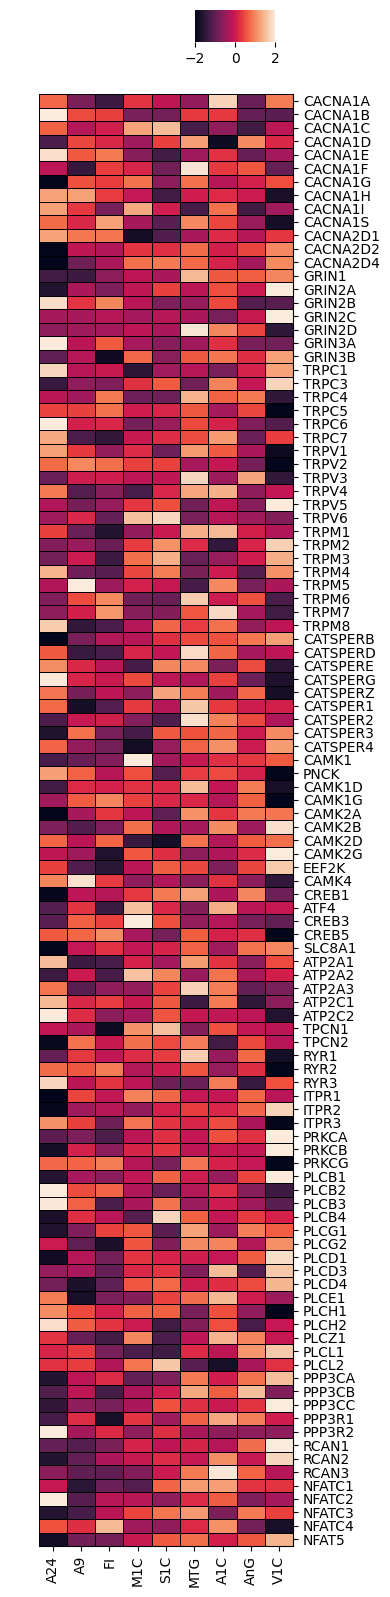

In [17]:
fig = sns.clustermap(
    L4_IT_rna_region_counts[region_align, genes_of_interest].X.T,
    xticklabels=region_align,
    yticklabels=genes_of_interest,
    z_score="row",
    figsize=(4, 16),
    col_cluster=False,
    row_cluster=False,
    dendrogram_ratio=(0.1, 0.05),
    cbar_pos=(0.5, 0.975, 0.2, 0.02),
    cbar_kws={"orientation": "horizontal"},
    tree_kws={"linewidth": 2},
    linewidth=0.5,
    linecolor="black",
    vmin=-2,
    vmax=2
)
fig.ax_heatmap.spines["right"].set_visible(True)
fig.ax_heatmap.spines["bottom"].set_visible(True)
fig.savefig(plot_dir / "L4_IT_Calcineurin-NFAT_genes_RNA_zscore.png", dpi=300, format="png")

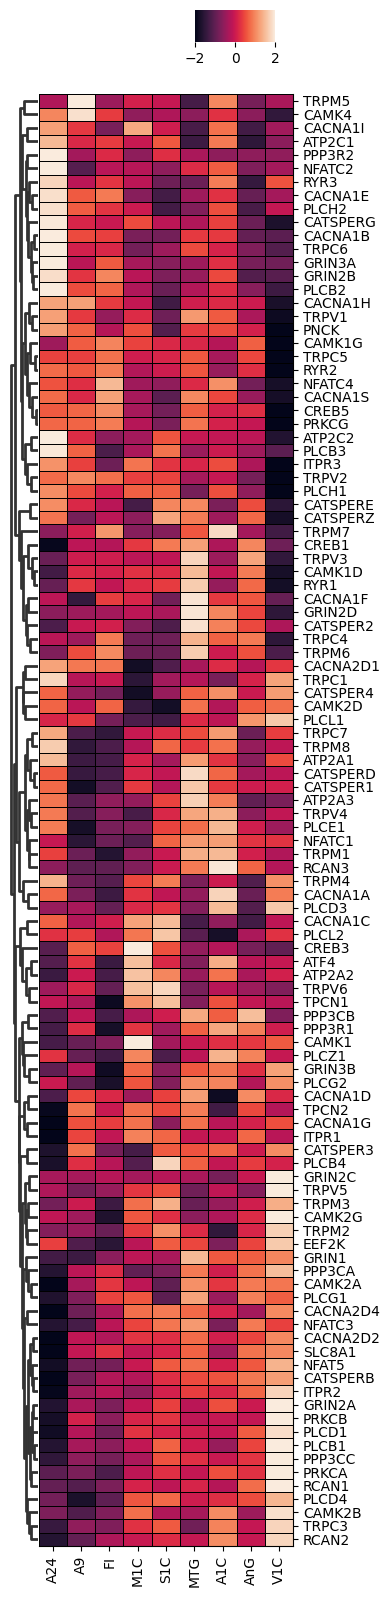

In [18]:
fig = sns.clustermap(
    L4_IT_rna_region_counts[region_align, genes_of_interest].X.T,
    xticklabels=region_align,
    yticklabels=genes_of_interest,
    z_score="row",
    figsize=(4, 16),
    col_cluster=False,
    row_cluster=True,
    dendrogram_ratio=(0.1, 0.05),
    cbar_pos=(0.5, 0.975, 0.2, 0.02),
    cbar_kws={"orientation": "horizontal"},
    tree_kws={"linewidth": 2},
    linewidth=0.5,
    linecolor="black",
    vmin=-2,
    vmax=2
)
fig.ax_heatmap.spines["right"].set_visible(True)
fig.ax_heatmap.spines["bottom"].set_visible(True)
fig.savefig(plot_dir / "L4_IT_Calcineurin-NFAT_genes_RNA_zscore_dendro.png", dpi=300, format="png")

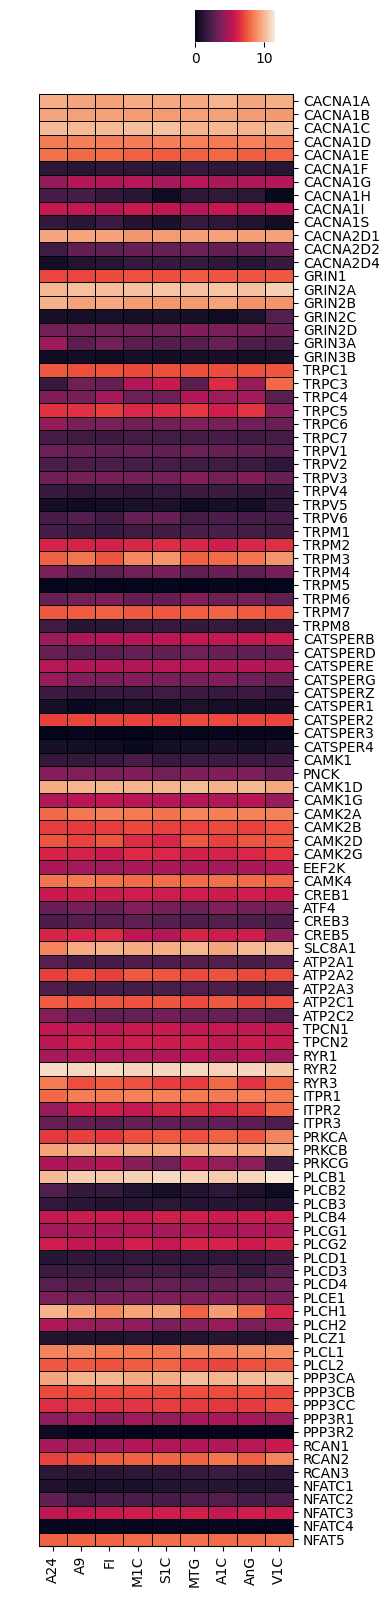

In [19]:
fig = sns.clustermap(
    L4_IT_rna_region_counts[region_align, genes_of_interest].X.T,
    xticklabels=region_align,
    yticklabels=genes_of_interest,
    # z_score="",
    figsize=(4, 16),
    col_cluster=False,
    row_cluster=False,
    dendrogram_ratio=(0.1, 0.05),
    cbar_pos=(0.5, 0.975, 0.2, 0.02),
    cbar_kws={"orientation": "horizontal"},
    tree_kws={"linewidth": 2},
    linewidth=0.5,
    linecolor="black",
    # vmin=-2,
    # vmax=2
)
fig.ax_heatmap.spines["right"].set_visible(True)
fig.ax_heatmap.spines["bottom"].set_visible(True)
fig.savefig(plot_dir / "L4_IT_Calcineurin-NFAT_genes_RNA_raw.png", dpi=300, format="png")

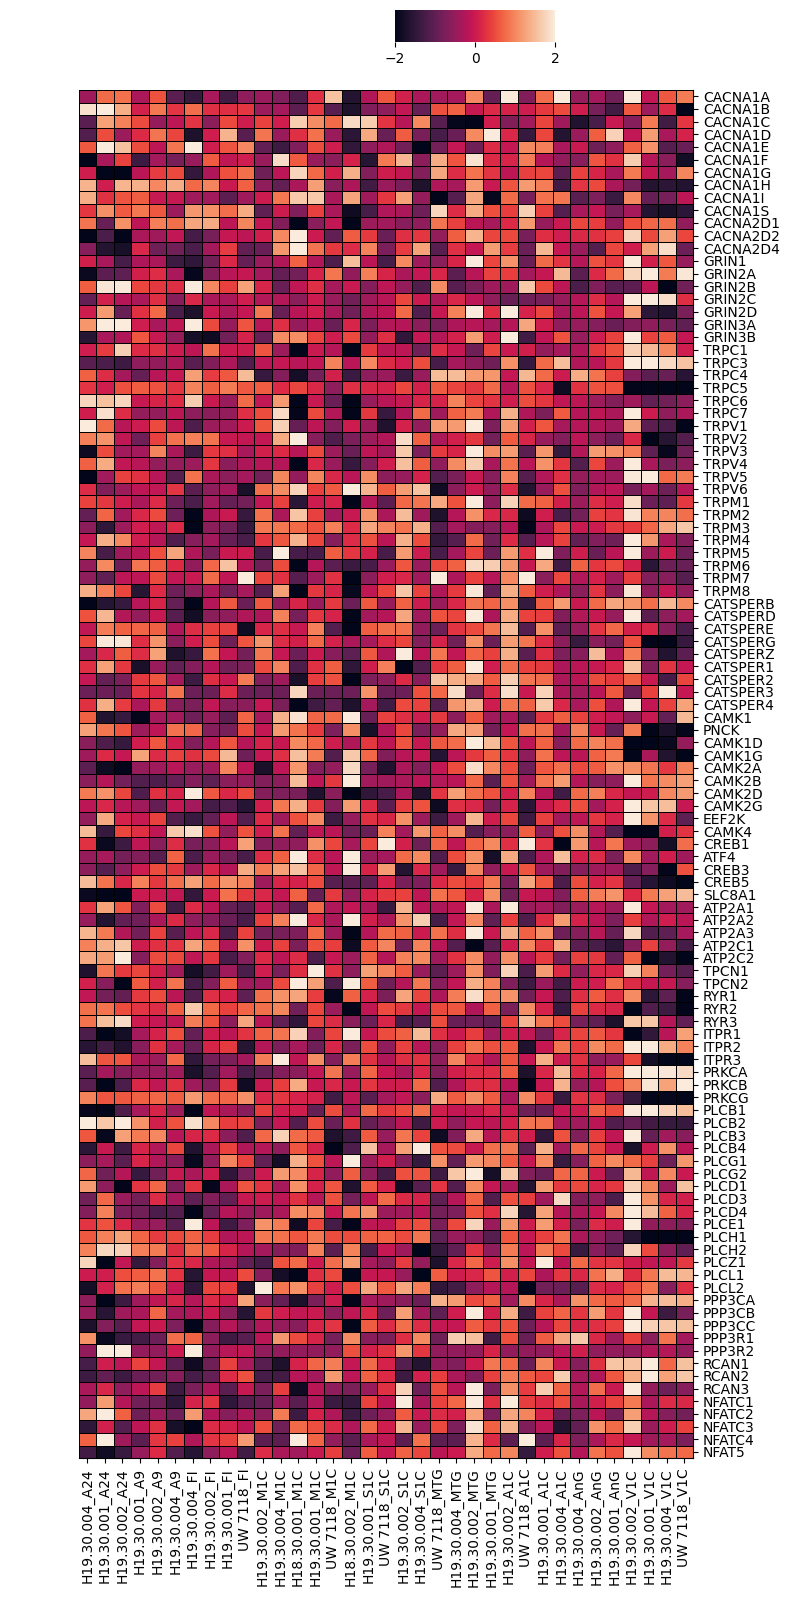

In [22]:
fig = sns.clustermap(
    L4_IT_rna_region_donor_counts[region_donor_sorted_index, genes_of_interest].X.T,
    xticklabels=region_donor_sorted_index,
    yticklabels=genes_of_interest,
    z_score="row",
    figsize=(8, 16),
    col_cluster=False,
    row_cluster=False,
    dendrogram_ratio=(0.1, 0.05),
    cbar_pos=(0.5, 0.975, 0.2, 0.02),
    cbar_kws={"orientation": "horizontal"},
    tree_kws={"linewidth": 2},
    linewidth=0.5,
    linecolor="black",
    vmin=-2,
    vmax=2
)
fig.ax_heatmap.spines["right"].set_visible(True)
fig.ax_heatmap.spines["bottom"].set_visible(True)
fig.savefig(plot_dir / "L4_IT_Calcineurin-NFAT_genes_RNA_donor_zscore.png", dpi=300, format="png")

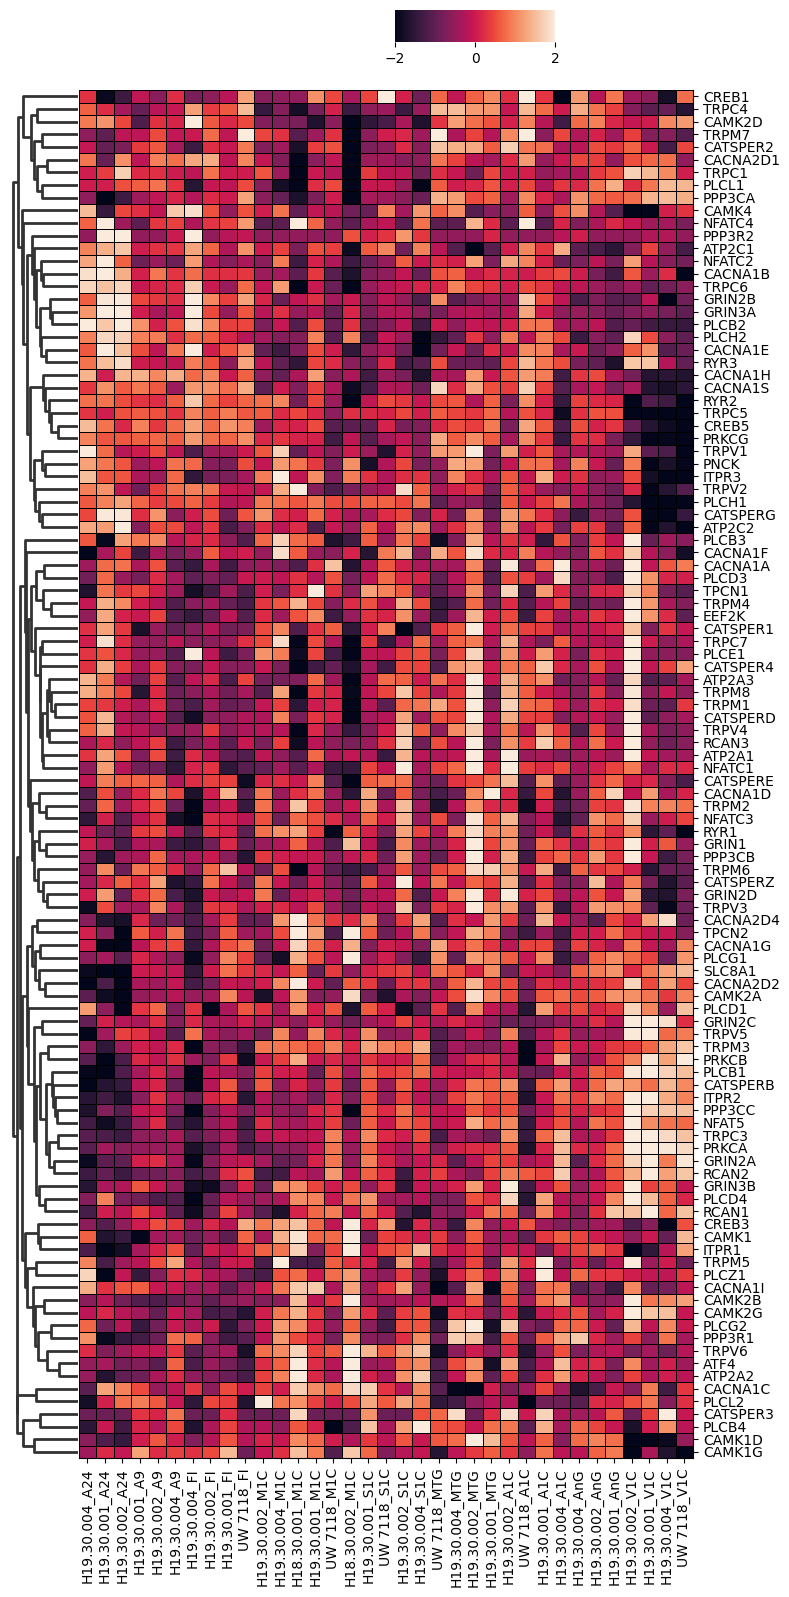

In [23]:
fig = sns.clustermap(
    L4_IT_rna_region_donor_counts[region_donor_sorted_index, genes_of_interest].X.T,
    xticklabels=region_donor_sorted_index,
    yticklabels=genes_of_interest,
    z_score="row",
    figsize=(8, 16),
    col_cluster=False,
    row_cluster=True,
    dendrogram_ratio=(0.1, 0.05),
    cbar_pos=(0.5, 0.975, 0.2, 0.02),
    cbar_kws={"orientation": "horizontal"},
    tree_kws={"linewidth": 2},
    linewidth=0.5,
    linecolor="black",
    vmin=-2,
    vmax=2
)
fig.ax_heatmap.spines["right"].set_visible(True)
fig.ax_heatmap.spines["bottom"].set_visible(True)
fig.savefig(plot_dir / "L4_IT_Calcineurin-NFAT_genes_RNA_donor_zscore_dendro.png", dpi=300, format="png")

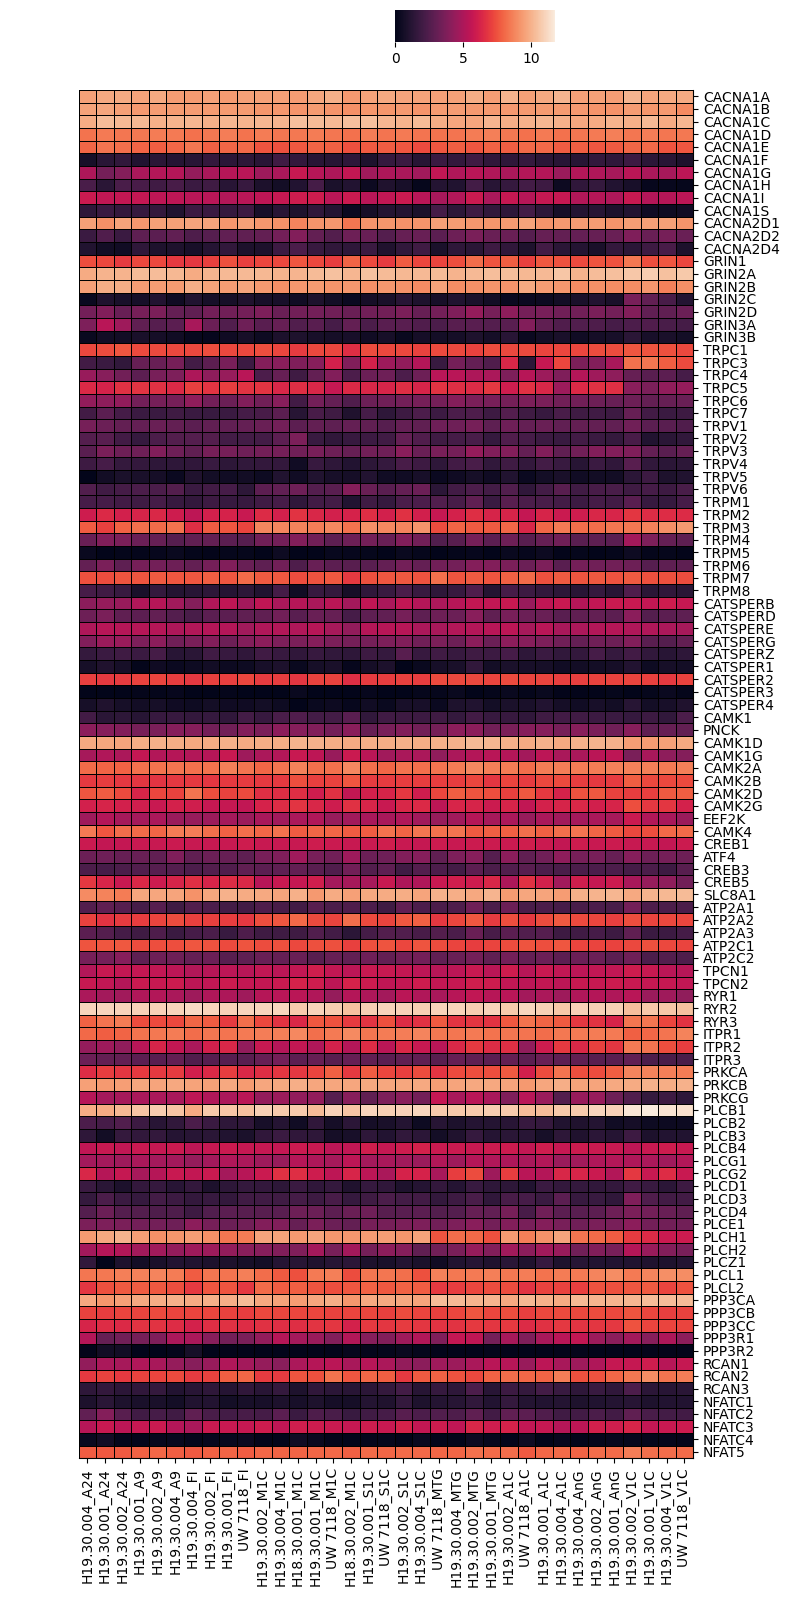

In [24]:
fig = sns.clustermap(
    L4_IT_rna_region_donor_counts[region_donor_sorted_index, genes_of_interest].X.T,
    xticklabels=region_donor_sorted_index,
    yticklabels=genes_of_interest,
    # z_score="row",
    figsize=(8, 16),
    col_cluster=False,
    row_cluster=False,
    dendrogram_ratio=(0.1, 0.05),
    cbar_pos=(0.5, 0.975, 0.2, 0.02),
    cbar_kws={"orientation": "horizontal"},
    tree_kws={"linewidth": 2},
    linewidth=0.5,
    linecolor="black",
    # vmin=-2,
    # vmax=2
)
fig.ax_heatmap.spines["right"].set_visible(True)
fig.ax_heatmap.spines["bottom"].set_visible(True)
fig.savefig(plot_dir / "L4_IT_Calcineurin-NFAT_genes_RNA_donor_raw.png", dpi=300, format="png")

In [8]:
genes_of_interest = [
    "PPP3CA", 
    "PPP3CB", 
    "PPP3CC", 
    "PPP3R1", 
    "PPP3R2",
    "NFATC2", #"NFAT1", 
    "NFATC1", #"NFAT2", 
    "NFATC4", #"NFAT3", 
    "NFATC3", #"NFAT4", 
    "NFAT5",
    "RCAN1", 
    "RCAN2", 
    "RCAN3", 
    # "RCAN4"
]

In [9]:
genes_of_interest = [
    gene for gene in genes_of_interest if gene in L4_IT_rna_region_counts.var.index.to_list()]

In [10]:
region_align = ["A24", "A9", "FI", "M1C", "S1C", "MTG", "A1C", "AnG", "V1C"]
L4_IT_rna_region_counts.obs["Region"] = pd.Categorical(
    L4_IT_rna_region_counts.obs["Region"], categories=region_align
)

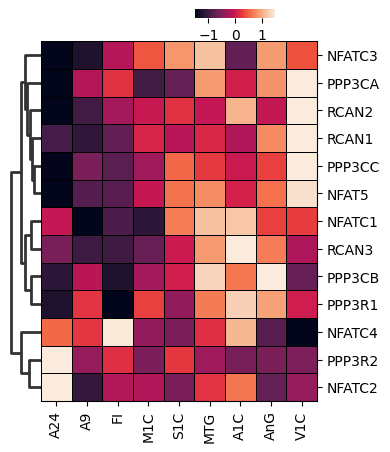

In [11]:
fig = sns.clustermap(
    L4_IT_rna_region_counts[region_align, genes_of_interest].X.T,
    xticklabels=region_align,
    yticklabels=genes_of_interest,
    z_score="row",
    figsize=(4, 4.5),
    col_cluster=False,
    row_cluster=True,
    dendrogram_ratio=(0.1, 0.05),
    cbar_pos=(0.5, 0.975, 0.2, 0.02),
    cbar_kws={"orientation": "horizontal"},
    tree_kws={"linewidth": 2},
    linewidth=0.5,
    linecolor="black",
    vmin=-1.5,
    vmax=1.5
)
fig.ax_heatmap.spines["right"].set_visible(True)
fig.ax_heatmap.spines["bottom"].set_visible(True)
fig.savefig(plot_dir / "L4_IT_Calcineurin-NFAT_genes_RNA.png", dpi=300, format="png")

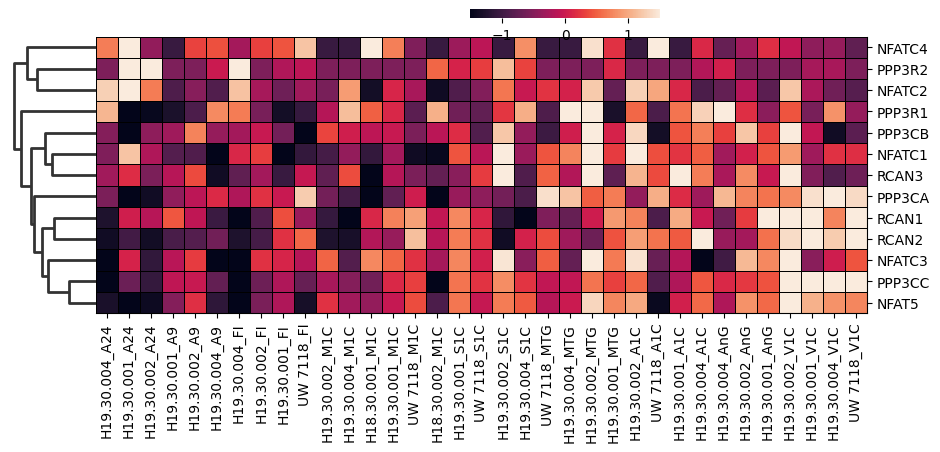

In [12]:
fig = sns.clustermap(
    L4_IT_rna_region_donor_counts[region_donor_sorted_index, genes_of_interest].X.T,
    xticklabels=region_donor_sorted_index,
    yticklabels=genes_of_interest,
    z_score="row",
    figsize=(9.5, 4.5),
    col_cluster=False,
    row_cluster=True,
    dendrogram_ratio=(0.1, 0.05),
    cbar_pos=(0.5, 0.975, 0.2, 0.02),
    cbar_kws={"orientation": "horizontal"},
    tree_kws={"linewidth": 2},
    linewidth=0.5,
    linecolor="black",
    vmin=-1.5,
    vmax=1.5
)
fig.ax_heatmap.spines["right"].set_visible(True)
fig.ax_heatmap.spines["bottom"].set_visible(True)
fig.savefig(plot_dir / "L4_IT_Calcineurin-NFAT_genes_RNA_donor_replicate.png", dpi=300, format="png")

In [13]:
genes_of_interest = [
    "PLCB1",
    "PLCB2",
    "PLCB3",
    "PLCB4",
    "PLCG1",
    "PLCG2",
    "PLCD1",
    "PLCD3",
    "PLCD4",
    "PLCE1",
    "PLCH1",
    "PLCH2",
    "PLCZ1",
    "PLCL1",
    "PLCL2",
    "PRKCA",
    "PRKCB",
    "PRKCG",
    "CATSPE",
    "CATSPE",
    "CATSPE",
    "CATSPE",
    "CATSPE",
    "CATSPE",
    "CATSPE",
    "CATSPE",
    "CATSPE",
    "TPCN1",
    "TPCN2",
    "RYR1",
    "RYR2",
    "RYR3",
    "ITPR1",
    "ITPR2",
    "ITPR3",
    "CACNG1",
    "CACNG2",
    "CACNG3",
    "CACNG4",
    "CACNG5",
    "CACNG6",
    "CACNG7",
    "CACNG8",
    "CACNA1",
    "CACNA1",
    "CACNA1",
    "CACNA1",
    "CACNA1",
    "CACNA1",
    "CACNA1",
    "CACNA1",
    "CACNA1",
    "CACNA1",
    "CACNA2",
    "CACNA2",
    "CACNA2",
    "CACNB1",
    "CACNB2",
    "CACNB3",
    "CACNB4",
    "KCNMA1",
    "KCNN1",
    "KCNN2",
    "KCNN3",
    "KCNN4",
    "KCNU1",
    "SCN1A",
    "SCN2A",
    "SCN3A",
    "SCN4A",
    "SCN5A",
    "SCN8A",
    "SCN9A",
    "SCN10A",
    "SCN11A",
    "SCN1B",
    "SCN2B",
    "SCN3B",
    "SCN4B",
    "CDH1",
    "CDH2",
    "CDH3",
    "CDH4",
    "CDH15",
    "CDH5",
    "CDH6",
    "CDH7",
    "CDH8",
    "CDH9",
    "CDH10",
    "CDH11",
    "CDH12",
    "CDH18",
    "CDH19",
    "CDH20",
    "CDH22",
    "CDH24",
]

In [14]:
genes_of_interest = [
    gene for gene in genes_of_interest if gene in L4_IT_rna_region_counts.var.index.to_list()]

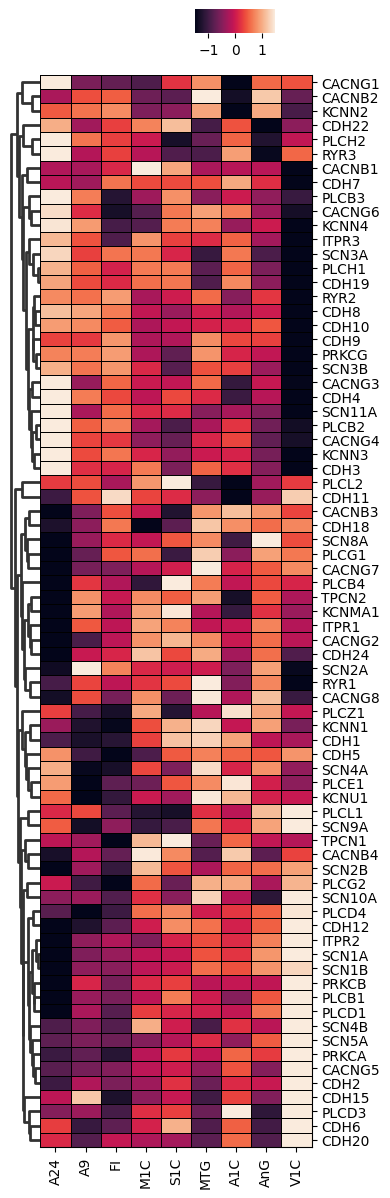

In [15]:
fig = sns.clustermap(
    L4_IT_rna_region_counts[region_align, genes_of_interest].X.T,
    xticklabels=region_align,
    yticklabels=genes_of_interest,
    z_score="row",
    figsize=(4, 12),
    col_cluster=False,
    row_cluster=True,
    dendrogram_ratio=(0.1, 0.05),
    cbar_pos=(0.5, 0.975, 0.2, 0.02),
    cbar_kws={"orientation": "horizontal"},
    tree_kws={"linewidth": 2},
    linewidth=0.5,
    linecolor="black",
    vmin=-1.5,
    vmax=1.5
)
fig.ax_heatmap.spines["right"].set_visible(True)
fig.ax_heatmap.spines["bottom"].set_visible(True)
fig.savefig(plot_dir / "L4_IT_Calcineurin-NFAT_genes_RNA_v2.png", dpi=300, format="png")

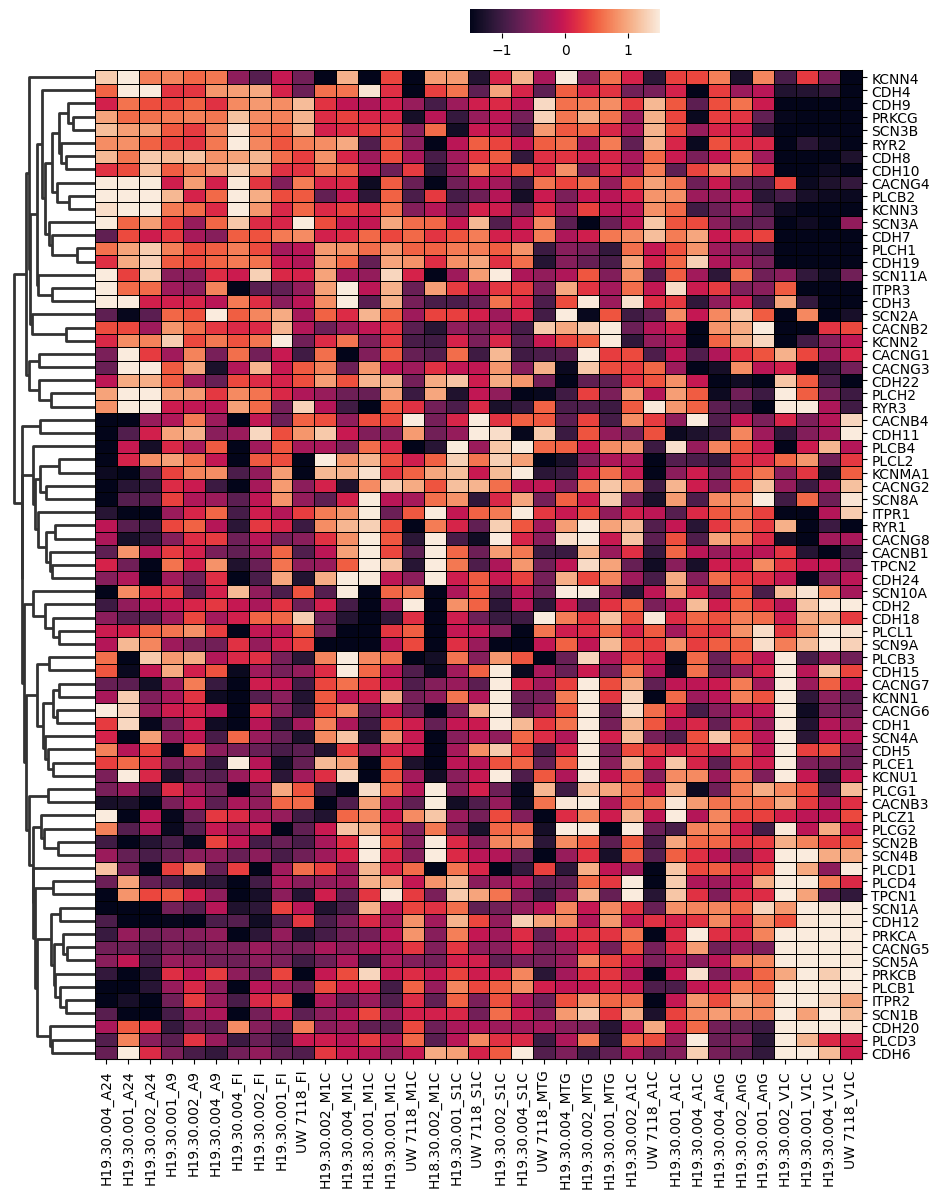

In [16]:
fig = sns.clustermap(
    L4_IT_rna_region_donor_counts[region_donor_sorted_index, genes_of_interest].X.T,
    xticklabels=region_donor_sorted_index,
    yticklabels=genes_of_interest,
    z_score="row",
    figsize=(9.5, 12),
    col_cluster=False,
    row_cluster=True,
    dendrogram_ratio=(0.1, 0.05),
    cbar_pos=(0.5, 0.975, 0.2, 0.02),
    cbar_kws={"orientation": "horizontal"},
    tree_kws={"linewidth": 2},
    linewidth=0.5,
    linecolor="black",
    vmin=-1.5,
    vmax=1.5
)
fig.ax_heatmap.spines["right"].set_visible(True)
fig.ax_heatmap.spines["bottom"].set_visible(True)
fig.savefig(plot_dir / "L4_IT_Calcineurin-NFAT_genes_RNA_donor_replicate_v2.png", dpi=300, format="png")

In [20]:
positive_genes = [
    "SCN1A", "CDH12", "PRKCA", "CACNG5", "SCN5A", "PRKCB",
    "PLCB1", "ITPR2", "SCN1B", "CDH20", "PLCD3", "CDH6"
]
positive_genes_df = pd.DataFrame({"Gene": positive_genes})
positive_genes_edges = pd.merge(
    left=regulons_table,
    right=positive_genes_df,
    left_on="Gene",
    right_on="Gene",
    how="inner"
)

In [23]:
positive_tfs = positive_genes_edges["TF"].unique()

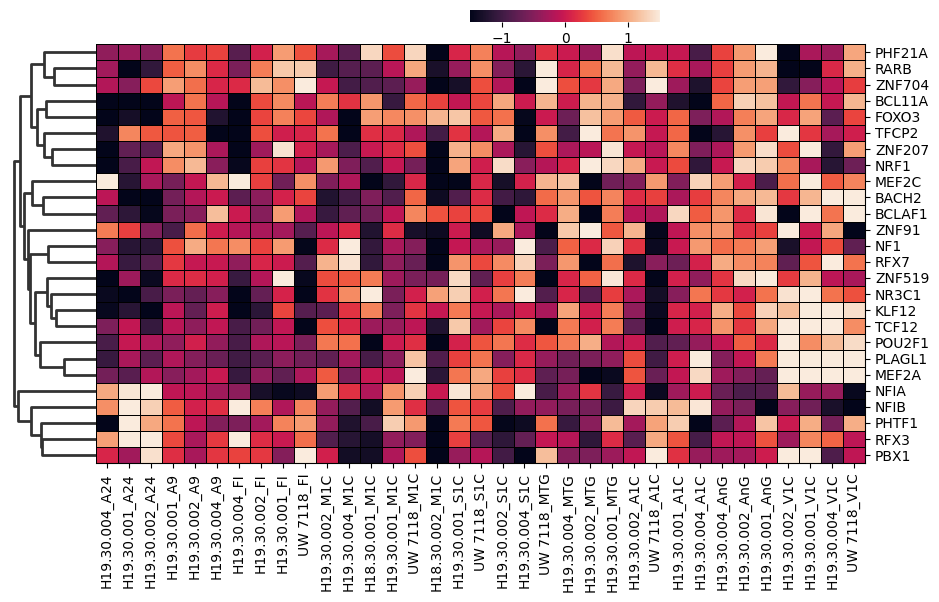

In [26]:
fig = sns.clustermap(
    L4_IT_rna_region_donor_counts[region_donor_sorted_index, positive_tfs].X.T,
    xticklabels=region_donor_sorted_index,
    yticklabels=positive_tfs,
    z_score="row",
    figsize=(9.5, 6),
    col_cluster=False,
    row_cluster=True,
    dendrogram_ratio=(0.1, 0.05),
    cbar_pos=(0.5, 0.975, 0.2, 0.02),
    cbar_kws={"orientation": "horizontal"},
    tree_kws={"linewidth": 2},
    linewidth=0.5,
    linecolor="black",
    vmin=-1.5,
    vmax=1.5
)
fig.ax_heatmap.spines["right"].set_visible(True)
fig.ax_heatmap.spines["bottom"].set_visible(True)

In [27]:
negative_genes = [
    "CDH4", "CDH9", "PRKCG", "SCN3B", "PYR2", "CDH8", "CDH10",
    "CACNG4", "PLCB2", "KCNN3", "SCN3A", "CDH7", "PLCH1", "CDH19",
    "SCN11A"
]
negative_genes_df = pd.DataFrame({"Gene": negative_genes})
negative_genes_edges = pd.merge(
    left=regulons_table,
    right=negative_genes_df,
    left_on="Gene",
    right_on="Gene",
    how="inner"
)

In [28]:
negative_tfs = negative_genes_edges["TF"].unique()

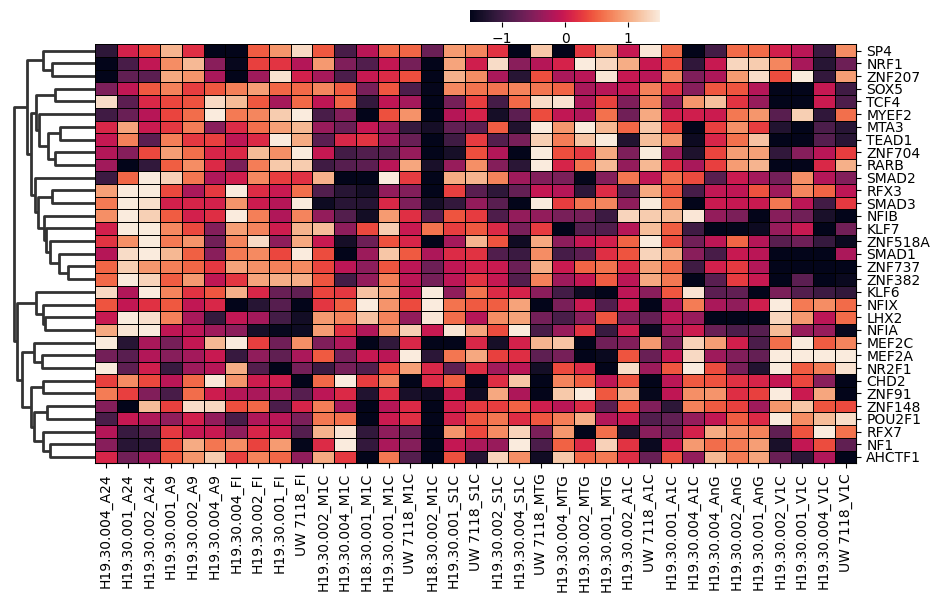

In [29]:
fig = sns.clustermap(
    L4_IT_rna_region_donor_counts[region_donor_sorted_index, negative_tfs].X.T,
    xticklabels=region_donor_sorted_index,
    yticklabels=negative_tfs,
    z_score="row",
    figsize=(9.5, 6),
    col_cluster=False,
    row_cluster=True,
    dendrogram_ratio=(0.1, 0.05),
    cbar_pos=(0.5, 0.975, 0.2, 0.02),
    cbar_kws={"orientation": "horizontal"},
    tree_kws={"linewidth": 2},
    linewidth=0.5,
    linecolor="black",
    vmin=-1.5,
    vmax=1.5
)
fig.ax_heatmap.spines["right"].set_visible(True)
fig.ax_heatmap.spines["bottom"].set_visible(True)